In [8]:
!pip install pandas numpy nltk gensim matplotlib seaborn scikit-learn kaggle


  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 2.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 4.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.7/28.7 MB 3.0 MB/s eta 0:00:0000:0100:01
  Created wheel for fst-pso: filename=fst_pso-1.8.1-py3-none-any.whl size=20430 sha256=ffb7c1e87ab1ee54ebc7aac78172c09405a956e3471a1b3dadbe6f85849e2302
  Stored in directory: /Users/sirireddykeesari/Library/Caches/pip/wheels/69/f5/e5/18ad53fe1ed6b2af9fad05ec052e4acbac8e92441df44bad2e
  Created wheel for miniful: filename=miniful-0.0.6-py3-none-any.whl size=3513 sha256=ebff3a2d53dced503a96bd8dc0fd398fe76f64bb2fb3bf5078acca045bca84a3
  Stored in directory: /Users/sirireddykeesari/Library/Caches/pip/wheels/9d/ff/2f/afe4cd56f47de147407705626517d68bea0f3b74eb1fb168e6
Successfully built fst-pso miniful
  Attempting uninstall: numpy
    Found existing in

In [ ]:
import pandas as pd

# Load dataset (Make sure the CSV file is in the same directory as your notebook)
df = pd.read_csv("/Users/91966/Desktop/nlp/email.csv")

# Display first few rows
print(df.head())

# Check column names
print(df.columns)


  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
Index(['Category', 'Message'], dtype='object')


In [36]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [37]:
print(df.columns)

Index(['Category', 'Message'], dtype='object')


In [38]:
import numpy as np

def print_raw_embeddings(model):
    words = list(model.wv.index_to_key)  # Get words from the model
    word_vectors = {word: model.wv[word] for word in words[:50]}  # Use first 50 words
    
    for word, vector in word_vectors.items():
        print(f"{word}: {vector}")

# Print raw embeddings
print_raw_embeddings(word2vec_model)


u: [-3.5540152e-01  6.8449497e-01  1.0989446e-01 -4.6437599e-02
  1.6313270e-01 -1.1486002e+00  2.3323265e-01  1.6920516e+00
 -5.6100529e-01 -2.5585598e-01 -5.6022996e-01 -1.1949959e+00
 -1.9455718e-01  3.3778098e-01  9.6256599e-02 -6.8623221e-01
  3.1663574e-02 -7.9397720e-01 -1.2839335e-01 -1.2670254e+00
  2.9973996e-01  3.5211346e-01  3.2837832e-01 -4.3349186e-01
 -1.6016233e-01  3.3675120e-03 -2.9615191e-01 -5.4537970e-01
 -6.6414690e-01 -7.0752159e-02  6.9854635e-01 -2.3420312e-01
  3.7533447e-01 -4.3798125e-01 -3.2288367e-01  6.7438847e-01
  1.0689069e-01 -7.8035796e-01 -2.5378108e-01 -1.4827528e+00
  1.4273380e-02 -4.6397868e-01 -3.2418826e-01  1.1767707e-03
  7.9492337e-01 -2.3224142e-01 -5.2829218e-01 -1.8886562e-03
  4.0399441e-01  3.2161397e-01  3.1802434e-01 -6.4843184e-01
 -1.3178185e-01 -1.6623932e-01 -3.1027752e-01  2.8401271e-01
  4.8031411e-01  3.0091355e-02 -5.4914588e-01  1.9341768e-01
  3.2264850e-01  3.8128886e-01 -5.9737259e-01  2.1926465e-02
 -8.5024726e-01  6.07

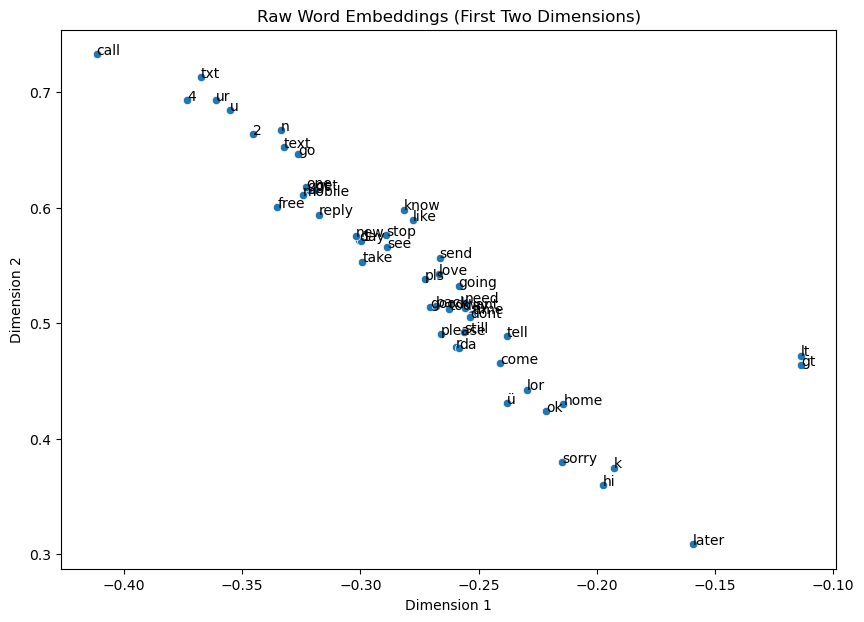

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_raw_embeddings(model):
    words = list(model.wv.index_to_key)  # Get words from the model
    word_vectors = np.array([model.wv[word] for word in words[:50]])  # Use first 50 words

    # Plot raw embeddings (first two dimensions)
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x=word_vectors[:, 0], y=word_vectors[:, 1])
    
    for i, word in enumerate(words[:50]):  # Annotate first 50 words
        plt.annotate(word, (word_vectors[i, 0], word_vectors[i, 1]))
    
    plt.title("Raw Word Embeddings (First Two Dimensions)")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.show()

# Visualize raw embeddings
plot_raw_embeddings(word2vec_model)


In [40]:
# Apply preprocessing
df["cleaned_message"] = df["Message"].apply(preprocess_text)

# Display cleaned data
print(df[["Category", "cleaned_message"]].head())


  Category                                    cleaned_message
0      ham  [go, jurong, point, crazy, available, bugis, n...
1      ham                     [ok, lar, joking, wif, u, oni]
2     spam  [free, entry, 2, wkly, comp, win, fa, cup, fin...
3      ham      [u, dun, say, early, hor, u, c, already, say]
4      ham     [nah, think, goes, usf, lives, around, though]


In [41]:
from gensim.models import Word2Vec

# Create a corpus (list of tokenized messages)
corpus = df["cleaned_message"].tolist()

# Train Word2Vec Model
word2vec_model = Word2Vec(sentences=corpus, vector_size=100, window=5, min_count=2, workers=4)

# Save the model
word2vec_model.save("word2vec_email.model")

# Display example word vector
print("Example word vector for 'free':\n", word2vec_model.wv["free"])


Example word vector for 'free':
 [-3.22109073e-01  5.97310543e-01  9.71079990e-02 -3.76246534e-02
  1.43191680e-01 -1.05206966e+00  2.00976640e-01  1.51286209e+00
 -5.00688553e-01 -2.19410896e-01 -4.85802770e-01 -1.06820238e+00
 -1.90666258e-01  3.00265342e-01  8.31659958e-02 -6.15029037e-01
  3.41625437e-02 -7.39792049e-01 -1.12258986e-01 -1.09865022e+00
  2.59879321e-01  3.22002113e-01  2.86451638e-01 -4.28699255e-01
 -1.26997963e-01  2.59771897e-03 -2.70821720e-01 -4.73819792e-01
 -5.78478038e-01 -5.52898832e-02  6.55552804e-01 -2.30145648e-01
  3.24019521e-01 -3.91136885e-01 -3.32921863e-01  5.96789241e-01
  8.76014158e-02 -7.43602633e-01 -2.16197327e-01 -1.32880056e+00
  6.05054908e-02 -4.07838732e-01 -3.11356604e-01  1.99619611e-03
  7.16967642e-01 -2.06399903e-01 -4.76737410e-01 -1.88258803e-03
  3.65684688e-01  2.86124676e-01  3.21208835e-01 -5.99902153e-01
 -1.43473282e-01 -1.44522518e-01 -2.95251101e-01  2.71187633e-01
  4.24956918e-01 -1.49739848e-03 -4.88277465e-01  1.32666

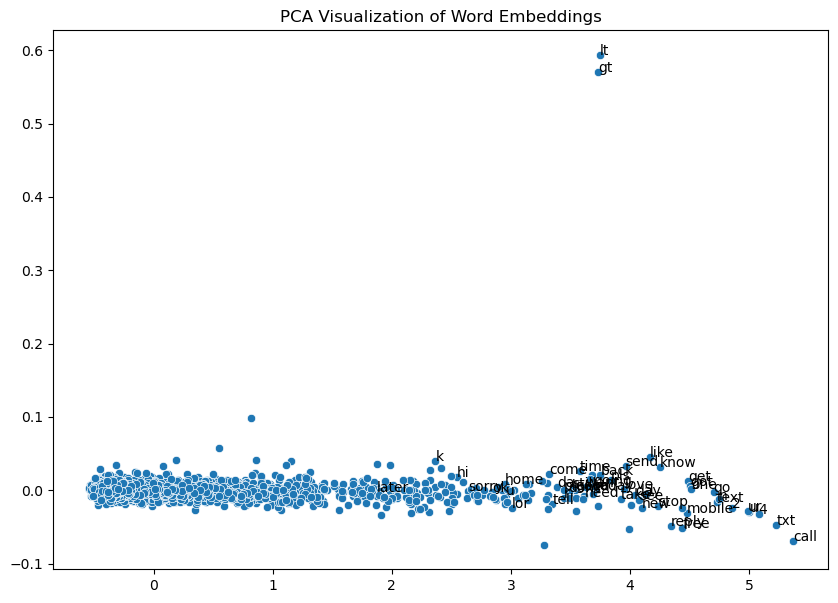

In [42]:
#PCA (Principal Component Analysis): PCA is a technique used for dimensionality reduction. 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Function to visualize embeddings using PCA
def plot_pca_embeddings(model):
    words = list(model.wv.index_to_key)  # Get words from the model
    word_vectors = np.array([model.wv[word] for word in words])

    # Apply PCA
    pca = PCA(n_components=2)
    word_vectors_pca = pca.fit_transform(word_vectors)

    # Plot embeddings
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x=word_vectors_pca[:, 0], y=word_vectors_pca[:, 1])
    for i, word in enumerate(words[:50]):  # Show first 50 words
        plt.annotate(word, (word_vectors_pca[i, 0], word_vectors_pca[i, 1]))
    plt.title("PCA Visualization of Word Embeddings")
    plt.show()

# Visualize using PCA
plot_pca_embeddings(word2vec_model)



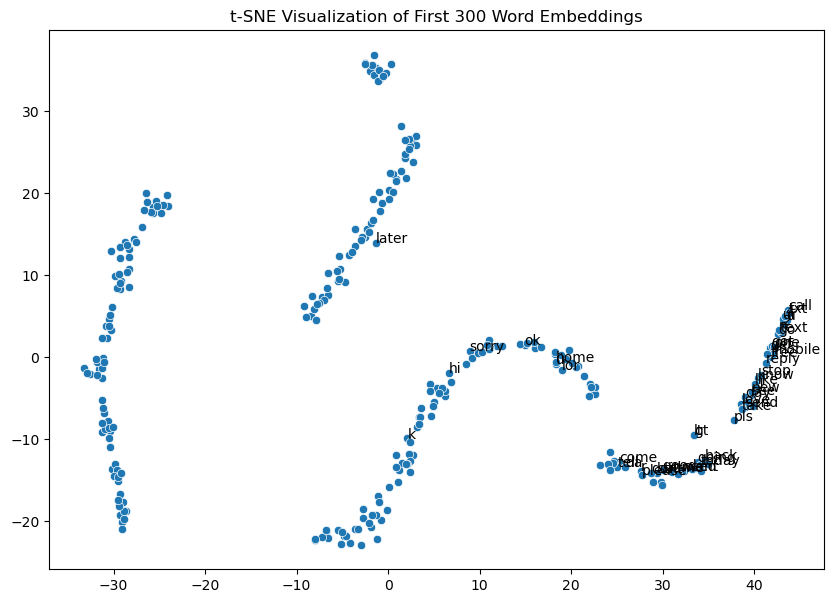

In [43]:
#t-SNE (t-distributed Stochastic Neighbor Embedding) - designed to preserve the local structure of data 
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to visualize embeddings using t-SNE for first 300 words
def plot_tsne_embeddings_300(model):
    words = list(model.wv.index_to_key)[:300]  # Get first 300 words
    word_vectors = np.array([model.wv[word] for word in words])

    # Apply t-SNE
    tsne = TSNE(n_components=2, perplexity=10, n_iter=500, random_state=42)
    word_vectors_tsne = tsne.fit_transform(word_vectors)

    # Plot embeddings
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x=word_vectors_tsne[:, 0], y=word_vectors_tsne[:, 1])
    
    for i, word in enumerate(words[:50]):  # Annotate first 50 words for readability
        plt.annotate(word, (word_vectors_tsne[i, 0], word_vectors_tsne[i, 1]))

    plt.title("t-SNE Visualization of First 300 Word Embeddings")
    plt.show()

# Visualize using t-SNE for first 300 words
plot_tsne_embeddings_300(word2vec_model)


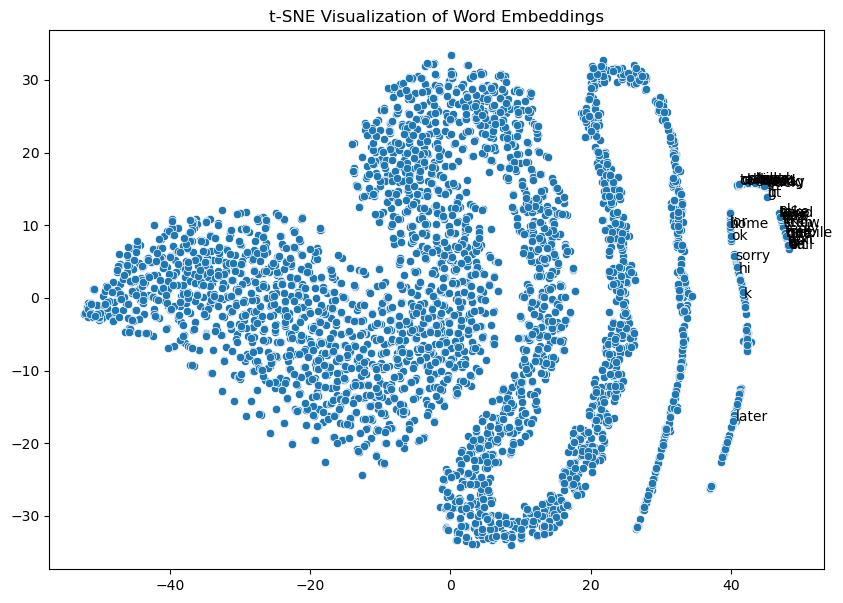

In [34]:

from sklearn.manifold import TSNE

# Function to visualize embeddings using t-SNE
def plot_tsne_embeddings(model):
    words = list(model.wv.index_to_key)  # Get words from the model
    word_vectors = np.array([model.wv[word] for word in words])

    # Apply t-SNE
    tsne = TSNE(n_components=2, perplexity=10, n_iter=500, random_state=42)

    word_vectors_tsne = tsne.fit_transform(word_vectors)

    # Plot embeddings
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x=word_vectors_tsne[:, 0], y=word_vectors_tsne[:, 1])
    for i, word in enumerate(words[:50]):  # Show first 50 words
        plt.annotate(word, (word_vectors_tsne[i, 0], word_vectors_tsne[i, 1]))
    plt.title("t-SNE Visualization of Word Embeddings")
    plt.show()

# Visualize using t-SNE
plot_tsne_embeddings(word2vec_model)


In [21]:
# Find similar words
print("\nWords similar to 'free':", word2vec_model.wv.most_similar("free"))

# Find similarity between words
print("\nSimilarity between 'money' and 'win':", word2vec_model.wv.similarity("money", "win"))



Words similar to 'free': [('txt', 0.9997898936271667), ('reply', 0.9997895956039429), ('mobile', 0.9997413754463196), ('text', 0.999718964099884), ('stop', 0.9997107982635498), ('ur', 0.9996896982192993), ('msg', 0.9996752738952637), ('call', 0.9996692538261414), ('name', 0.9996643662452698), ('4', 0.9996582269668579)]

Similarity between 'money' and 'win': 0.9994912


In [26]:
# Find similar words
print("\nWords similar to 'free':", word2vec_model.wv.most_similar("free"))

# Find similarity between words
print("\nSimilarity between 'winner' and 'mobile':", word2vec_model.wv.similarity("winner", "mobile"))



Words similar to 'free': [('txt', 0.9997898936271667), ('reply', 0.9997895956039429), ('mobile', 0.9997413754463196), ('text', 0.999718964099884), ('stop', 0.9997107982635498), ('ur', 0.9996896982192993), ('msg', 0.9996752738952637), ('call', 0.9996692538261414), ('name', 0.9996643662452698), ('4', 0.9996582269668579)]

Similarity between 'winner' and 'mobile': 0.9949877
